In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthetic-network-traffic/synthetic_network_traffic.csv


# **Import libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# **Import dataset**

In [3]:
df = pd.read_csv('/kaggle/input/synthetic-network-traffic/synthetic_network_traffic.csv')

In [4]:
print(df.head())

   SourceIP  DestinationIP  SourcePort  DestinationPort  Protocol  BytesSent  \
0  0.496714      -0.138264    0.647689         1.523030 -0.234153  -0.234137   
1 -0.463418      -0.465730    0.241962        -1.913280 -1.724918  -0.562288   
2  1.465649      -0.225776    0.067528        -1.424748 -0.544383   0.110923   
3 -0.601707       1.852278   -0.013497        -1.057711  0.822545  -1.220844   
4  0.738467       0.171368   -0.115648        -0.301104 -1.478522  -0.719844   

   BytesReceived  PacketsSent  PacketsReceived  Duration  IsAnomaly  
0       1.579213     0.767435        -0.469474  0.542560          0  
1      -1.012831     0.314247        -0.908024 -1.412304          0  
2      -1.150994     0.375698        -0.600639 -0.291694          0  
3       0.208864    -1.959670        -1.328186  0.196861          0  
4      -0.460639     1.057122         0.343618 -1.763040          0  


In [5]:
df.info

<bound method DataFrame.info of         SourceIP  DestinationIP  SourcePort  DestinationPort  Protocol  \
0       0.496714      -0.138264    0.647689         1.523030 -0.234153   
1      -0.463418      -0.465730    0.241962        -1.913280 -1.724918   
2       1.465649      -0.225776    0.067528        -1.424748 -0.544383   
3      -0.601707       1.852278   -0.013497        -1.057711  0.822545   
4       0.738467       0.171368   -0.115648        -0.301104 -1.478522   
...          ...            ...         ...              ...       ...   
999995  0.002725      -0.638022    0.840857         1.306959 -0.992010   
999996 -0.830555      -0.545716   -1.130178         0.021732 -0.565860   
999997  0.047510      -1.310967    0.173328        -1.367077  1.003435   
999998 -0.242768      -0.893310   -0.197664        -1.316390 -0.047899   
999999  0.702928      -0.506723   -0.927974        -0.190821 -0.037183   

        BytesSent  BytesReceived  PacketsSent  PacketsReceived  Duration  \
0  

In [6]:
df.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'Protocol', 'BytesSent', 'BytesReceived', 'PacketsSent',
       'PacketsReceived', 'Duration', 'IsAnomaly'],
      dtype='object')

# **Data Proccessing**

In [7]:
#using 'IsAnomaly' as target variable for simplicity

X = df.drop(['IsAnomaly'], axis = 1)
Y = df['IsAnomaly']

# **Split The Data**

In [8]:
# split the data into train test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

# **Standardize the Feature**

In [9]:
sl = StandardScaler()
X_train = sl.fit_transform(X_train)
X_test = sl.transform(X_test)

# **Train DecisionTreeRegressor**

In [10]:
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

# **Predict and Evaluate**

In [11]:
Y_pred = dtr.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.011106666666666667


# **Visualization**

**Scatter plot of actual vs predicted values**

<function matplotlib.pyplot.show(close=None, block=None)>

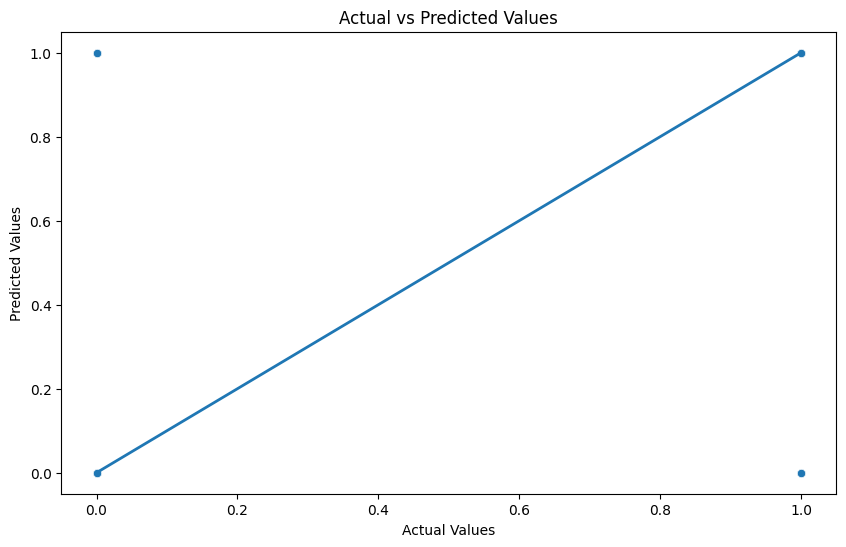

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show

**Feature importance barplot**

In [13]:
feature_importances = dtr.feature_importances_
features = X.columns

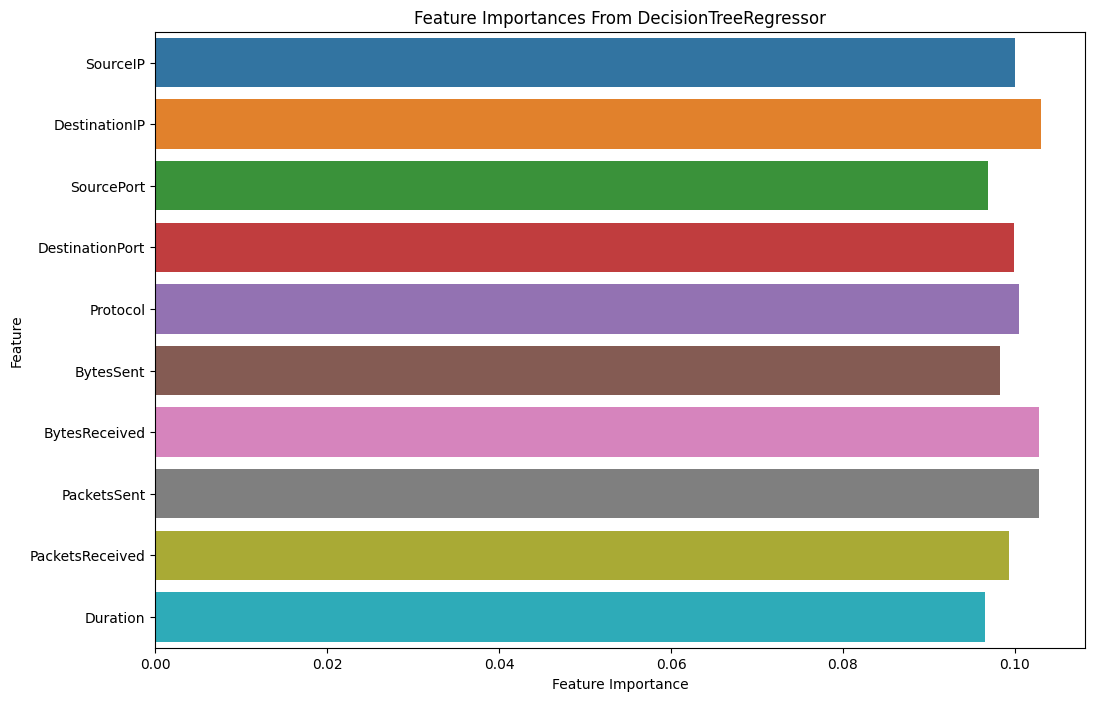

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances From DecisionTreeRegressor')
plt.show()